<a href="https://colab.research.google.com/github/divya43-gude/Depression_prediction/blob/main/ANN_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve

In [ ]:
from google.colab import files
import pandas as pd
uploaded = files.upload()
df = pd.read_csv("dep_1.csv")
df.columns = df.columns.str.strip()

Saving dep_1.csv to dep_1 (1).csv


Training Logistic Regression...
Logistic Regression Results:
Accuracy: 0.84
Precision: 0.71
Recall: 0.95
F1 Score: 0.81
ROC-AUC Score: 0.93



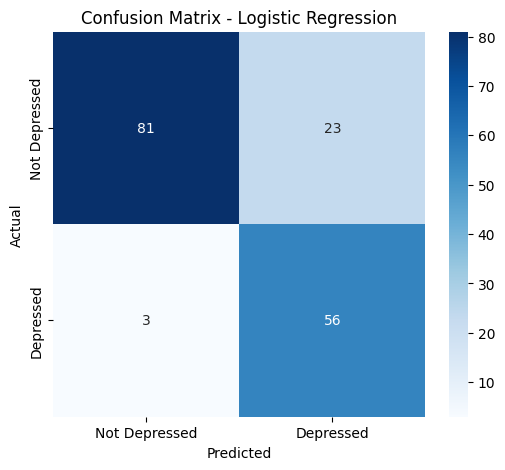

Training Random Forest...
Random Forest Results:
Accuracy: 0.81
Precision: 0.67
Recall: 0.93
F1 Score: 0.78
ROC-AUC Score: 0.92



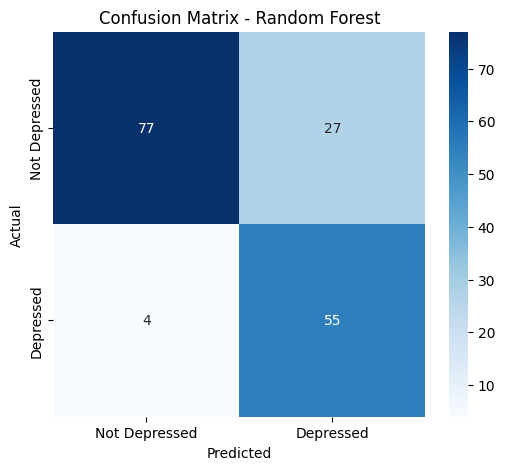

Training SVM...
SVM Results:
Accuracy: 0.83
Precision: 0.69
Recall: 0.95
F1 Score: 0.80
ROC-AUC Score: 0.87



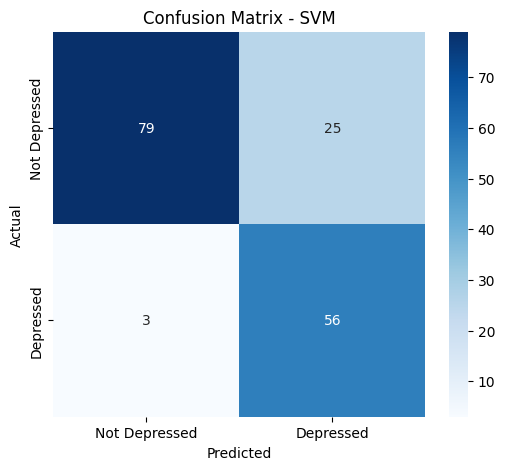

Training XGBoost...
XGBoost Results:
Accuracy: 0.83
Precision: 0.69
Recall: 0.95
F1 Score: 0.80
ROC-AUC Score: 0.92



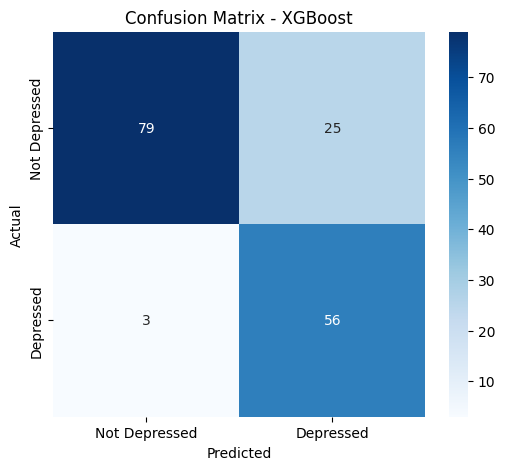


Model Performance Comparison:
           Logistic Regression  Random Forest       SVM   XGBoost
Accuracy              0.840491       0.809816  0.828221  0.828221
Precision             0.708861       0.670732  0.691358  0.691358
Recall                0.949153       0.932203  0.949153  0.949153
F1 Score              0.811594       0.780142  0.800000  0.800000
ROC-AUC               0.928129       0.920388  0.866362  0.919980


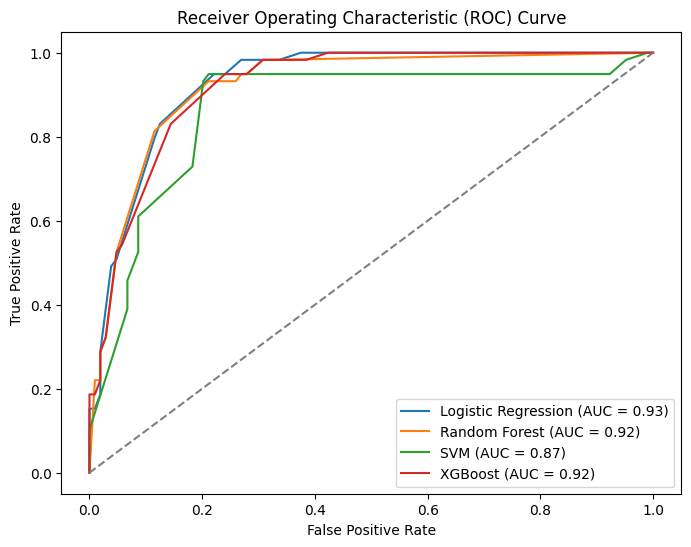


Depression Prediction Results:
     Actual      Predicted
0         1      Depressed
1         1      Depressed
2         1      Depressed
3         0      Depressed
4         1      Depressed
..      ...            ...
808       0  Not Depressed
809       0  Not Depressed
810       0  Not Depressed
811       0  Not Depressed
812       0  Not Depressed

[813 rows x 2 columns]

Depression predictions saved as 'depression_predictions.csv'


In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()), axis=0)
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]), axis=0)

X = df.drop(columns=["Number", "Depression State"])
y = df["Depression State"].apply(lambda x: 1 if x in ["Mild", "Moderate", "Severe"] else 0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
}

results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    results[name] = [accuracy, precision, recall, f1, roc_auc]

    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC-AUC Score: {roc_auc:.2f}\n")

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Depressed", "Depressed"], yticklabels=["Not Depressed", "Depressed"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"])
print("\nModel Performance Comparison:")
print(results_df)

plt.figure(figsize=(8, 6))
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

best_model = models["XGBoost"]
df["Predicted_Depression"] = best_model.predict(X_scaled)

df["Predicted_Label"] = df["Predicted_Depression"].apply(lambda x: "Depressed" if x == 1 else "Not Depressed")

depression_results = pd.DataFrame({"Actual": y, "Predicted": df["Predicted_Label"]})
print("\nDepression Prediction Results:")
print(depression_results)

depression_results.to_csv("depression_predictions.csv", index=False)
print("\nDepression predictions saved as 'depression_predictions.csv'")
